In [25]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

import concave_enclosed_csf_list
import csf_list
import _image_processing
import _image_curve
import enclosed_csf_list
import _metrics

In [2]:
from pathlib import Path

In [33]:
import importlib
importlib.reload(concave_enclosed_csf_list)
importlib.reload(enclosed_csf_list)

<module 'enclosed_csf_list' from 'C:\\Users\\ghage\\PycharmProjects\\enclosedcurveshorteningflow\\enclosed_csf_list.py'>

In [4]:
sil_path = r"C:\Users\ghage\PycharmProjects\enclosedcurveshorteningflow\lib\silhouettes\geographic"

In [5]:
sil_files = os.listdir(sil_path)

In [17]:
images = [_image_processing.load_image(os.path.join(sil_path, file)) for file in sil_files 
          if os.path.isfile(os.path.join(sil_path, file))]

In [18]:
open_images = [_image_processing.open_image(image, 5) for image in images]

In [19]:
image_curves = [_image_curve.ImageCurve(image).curve() for image in open_images]

In [ ]:
Path(os.path.join(sil_path, "image_curves/")).mkdir(parents=True, exist_ok=True)
with open(os.path.join(sil_path, "image_curves/image_curve.pickle"), 'wb') as f:
    pickle.dump(image_curves, f)

In [20]:
len(image_curves)

15

In [21]:
ecsf = concave_enclosed_csf_list.ConcaveEnclosedCSFList(image_curves[0], step_size=0.05, refresh_interval=500)

In [22]:
ecsf.run()

Iteration: 0, Concavity:  1449.90, Area to original %:  100.00, Length to original %:  100.00
Iteration: 500, Concavity:  22.61, Area to original %:  97.41, Length to original %:  78.12
Iteration: 1000, Concavity:  14.44, Area to original %:  95.04, Length to original %:  73.52
Iteration: 1500, Concavity:  10.71, Area to original %:  92.84, Length to original %:  70.44
Iteration: 2000, Concavity:  8.70, Area to original %:  90.81, Length to original %:  68.09
Iteration: 2500, Concavity:  7.55, Area to original %:  88.88, Length to original %:  66.10
Iteration: 3000, Concavity:  6.77, Area to original %:  87.06, Length to original %:  64.28
Iteration: 3500, Concavity:  6.23, Area to original %:  85.34, Length to original %:  62.48
Iteration: 4000, Concavity:  8.07, Area to original %:  83.59, Length to original %:  59.14
Iteration: 4500, Concavity:  8.10, Area to original %:  81.69, Length to original %:  55.95
Iteration: 5000, Concavity:  2.84, Area to original %:  80.14, Length to ori

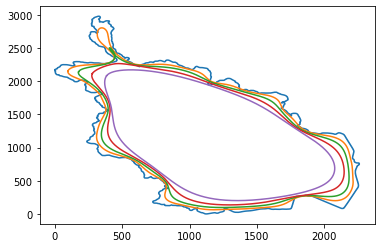

In [23]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[::20]]

In [27]:
_metrics.enclosed_area(ecsf.curves[0]), _metrics.enclosed_area(ecsf.curves[-1])

(3257736.5, 2144394.6283760704)

In [29]:
csf = csf_list.CSFList(ecsf.curves[-1])

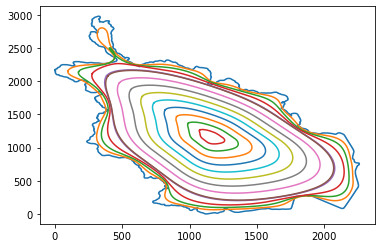

In [30]:
_ = [plt.plot(*curve.transpose()) for curve in ecsf.curves[::20]]
_ = [plt.plot(*curve.transpose()) for curve in csf.linspace_subsets_resample(10)]

In [31]:
cecsf = ecsf

In [34]:
ecsf = enclosed_csf_list.enclosed_csf_list(image_curves[0], 10, step_size=0.05)

Iteration: 0, Concavity:  1449.90, Area to original %:  100.00, Length to original %:  100.00
Iteration: 100, Concavity:  54.95, Area to original %:  99.40, Length to original %:  85.90
Iteration: 200, Concavity:  37.70, Area to original %:  98.88, Length to original %:  82.84
Iteration: 300, Concavity:  30.29, Area to original %:  98.38, Length to original %:  80.87
Iteration: 400, Concavity:  25.82, Area to original %:  97.89, Length to original %:  79.37
Iteration: 500, Concavity:  22.61, Area to original %:  97.41, Length to original %:  78.12
Iteration: 600, Concavity:  20.21, Area to original %:  96.93, Length to original %:  77.02
Iteration: 700, Concavity:  18.35, Area to original %:  96.44, Length to original %:  76.03
Iteration: 800, Concavity:  16.82, Area to original %:  95.97, Length to original %:  75.12
Iteration: 900, Concavity:  15.54, Area to original %:  95.50, Length to original %:  74.28
Iteration: 1000, Concavity:  14.44, Area to original %:  95.04, Length to orig

[[<matplotlib.lines.Line2D at 0x1ec486c8250>],

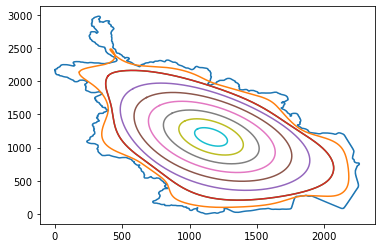

In [35]:
[plt.plot(*c.transpose()) for c in ecsf]